In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [48]:
temp_data=pd.read_csv('data/train.csv')
temp_data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [49]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


In [50]:
temp_data.shape

(21263, 82)

In [51]:
X=temp_data.drop('critical_temp',axis=1)
y=np.sqrt(temp_data['critical_temp'])

In [52]:
corr_matrix=X.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop=[col for col in X.columns if any(upper[col]>.95)]
to_drop

['wtd_gmean_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'std_Density',
 'std_ElectronAffinity',
 'wtd_gmean_FusionHeat',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence']

In [53]:
X.drop(to_drop,axis=1,inplace=True)
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,1.181795,1.062396,122.90607,31.794921,53.622535,775.425000,...,0.621979,0.308148,0.262848,399.97342,57.127669,2.25,2.257143,1,1.085714,0.437059
1,5,92.729214,58.518416,73.132787,1.449309,1.057755,122.90607,36.161939,53.979870,766.440000,...,0.619735,0.847404,0.567706,429.97342,51.413383,2.00,2.257143,2,1.128571,0.468606
2,4,88.944468,57.885242,66.361592,1.181795,0.975980,122.90607,35.741099,53.656268,775.425000,...,0.619095,0.308148,0.250477,399.97342,57.127669,2.25,2.271429,1,1.114286,0.444697
3,4,88.944468,57.873967,66.361592,1.181795,1.022291,122.90607,33.768010,53.639405,775.425000,...,0.620535,0.308148,0.257045,399.97342,57.127669,2.25,2.264286,1,1.100000,0.440952
4,4,88.944468,57.840143,66.361592,1.181795,1.129224,122.90607,27.848743,53.588771,775.425000,...,0.624878,0.308148,0.272820,399.97342,57.127669,2.25,2.242857,1,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,1.177145,1.254119,146.88130,15.504479,43.202659,661.775000,...,95.001493,1.029002,0.634332,134.00000,83.048889,3.25,3.555556,1,2.168889,0.496904
21259,5,92.266740,49.021367,64.812662,1.323287,1.571630,188.38390,7.353333,50.148287,747.780000,...,1.577047,0.949904,0.745515,399.97342,76.176553,2.20,2.047619,1,0.904762,0.212959
21260,2,99.663190,95.609104,99.433882,0.690847,0.530198,13.51362,53.041104,5.405448,733.550000,...,57.038314,0.683870,0.559446,17.00000,29.000000,4.50,4.800000,1,3.200000,0.400000
21261,2,99.663190,97.095602,99.433882,0.690847,0.640883,13.51362,31.115202,6.249958,733.550000,...,58.781651,0.683870,0.659671,17.00000,15.250000,4.50,4.690000,1,2.210000,0.462493


In [54]:
sample_data_index=X.sample(5).index
X.iloc[sample_data_index].to_csv('../temp_fastapi/data/sample_data.csv',
                   index_label=False)
X.drop(sample_data_index,axis=0)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,1.181795,1.062396,122.90607,31.794921,53.622535,775.425000,...,0.621979,0.308148,0.262848,399.97342,57.127669,2.25,2.257143,1,1.085714,0.437059
1,5,92.729214,58.518416,73.132787,1.449309,1.057755,122.90607,36.161939,53.979870,766.440000,...,0.619735,0.847404,0.567706,429.97342,51.413383,2.00,2.257143,2,1.128571,0.468606
2,4,88.944468,57.885242,66.361592,1.181795,0.975980,122.90607,35.741099,53.656268,775.425000,...,0.619095,0.308148,0.250477,399.97342,57.127669,2.25,2.271429,1,1.114286,0.444697
3,4,88.944468,57.873967,66.361592,1.181795,1.022291,122.90607,33.768010,53.639405,775.425000,...,0.620535,0.308148,0.257045,399.97342,57.127669,2.25,2.264286,1,1.100000,0.440952
4,4,88.944468,57.840143,66.361592,1.181795,1.129224,122.90607,27.848743,53.588771,775.425000,...,0.624878,0.308148,0.272820,399.97342,57.127669,2.25,2.242857,1,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,1.177145,1.254119,146.88130,15.504479,43.202659,661.775000,...,95.001493,1.029002,0.634332,134.00000,83.048889,3.25,3.555556,1,2.168889,0.496904
21259,5,92.266740,49.021367,64.812662,1.323287,1.571630,188.38390,7.353333,50.148287,747.780000,...,1.577047,0.949904,0.745515,399.97342,76.176553,2.20,2.047619,1,0.904762,0.212959
21260,2,99.663190,95.609104,99.433882,0.690847,0.530198,13.51362,53.041104,5.405448,733.550000,...,57.038314,0.683870,0.559446,17.00000,29.000000,4.50,4.800000,1,3.200000,0.400000
21261,2,99.663190,97.095602,99.433882,0.690847,0.640883,13.51362,31.115202,6.249958,733.550000,...,58.781651,0.683870,0.659671,17.00000,15.250000,4.50,4.690000,1,2.210000,0.462493


In [55]:
cols_dict=X.dtypes.to_dict()

new_cols={}
for col, type in cols_dict.items():
    if type == 'int64':
        new_cols[col] = 'int'
    else:
        new_cols[col] = 'float'

new_cols


{'number_of_elements': 'int',
 'mean_atomic_mass': 'float',
 'wtd_mean_atomic_mass': 'float',
 'gmean_atomic_mass': 'float',
 'entropy_atomic_mass': 'float',
 'wtd_entropy_atomic_mass': 'float',
 'range_atomic_mass': 'float',
 'wtd_range_atomic_mass': 'float',
 'wtd_std_atomic_mass': 'float',
 'mean_fie': 'float',
 'wtd_mean_fie': 'float',
 'wtd_entropy_fie': 'float',
 'range_fie': 'float',
 'wtd_range_fie': 'float',
 'wtd_std_fie': 'float',
 'mean_atomic_radius': 'float',
 'wtd_mean_atomic_radius': 'float',
 'gmean_atomic_radius': 'float',
 'range_atomic_radius': 'int',
 'wtd_range_atomic_radius': 'float',
 'mean_Density': 'float',
 'wtd_mean_Density': 'float',
 'gmean_Density': 'float',
 'entropy_Density': 'float',
 'wtd_entropy_Density': 'float',
 'range_Density': 'float',
 'wtd_range_Density': 'float',
 'wtd_std_Density': 'float',
 'mean_ElectronAffinity': 'float',
 'wtd_mean_ElectronAffinity': 'float',
 'gmean_ElectronAffinity': 'float',
 'wtd_gmean_ElectronAffinity': 'float',
 'e

In [56]:
import json 

with open('../temp_fastapi/data/cols.json','w') as f:
    json.dump(new_cols,f)

(array([3.45794468e-02, 5.75285691e-02, 1.11941873e-01, 1.64589859e-01,
        1.71235759e-01, 1.46832846e-01, 1.29283517e-01, 1.03426814e-01,
        9.98961795e-02, 1.01142286e-01, 7.61163197e-02, 8.96158035e-02,
        9.33541220e-02, 9.14849627e-02, 5.14018803e-02, 5.07788272e-02,
        5.35825661e-02, 6.15784142e-02, 7.91277430e-02, 1.17237824e-01,
        1.39460051e-01, 1.00311548e-01, 3.11526547e-02, 2.62720722e-02,
        1.50571165e-02, 1.06957448e-02, 2.07684365e-04, 0.00000000e+00,
        0.00000000e+00, 1.03842182e-04]),
 array([ 0.01449138,  0.46739068,  0.92028999,  1.37318929,  1.82608859,
         2.2789879 ,  2.7318872 ,  3.18478651,  3.63768581,  4.09058512,
         4.54348442,  4.99638373,  5.44928303,  5.90218233,  6.35508164,
         6.80798094,  7.26088025,  7.71377955,  8.16667886,  8.61957816,
         9.07247746,  9.52537677,  9.97827607, 10.43117538, 10.88407468,
        11.33697399, 11.78987329, 12.2427726 , 12.6956719 , 13.1485712 ,
        13.60147

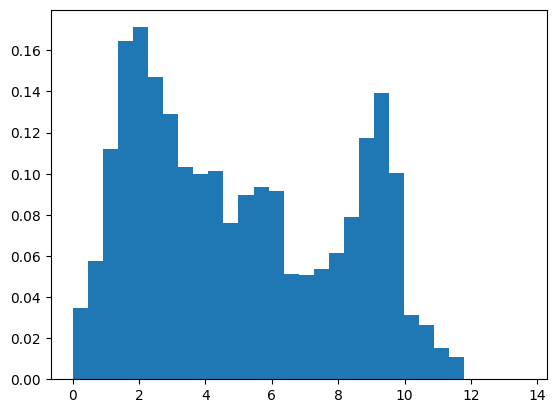

In [57]:
plt.hist(y,bins=30,density=True,)

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=36)

Support Vector Regression

Dropping highly correlated predictors and performing dimensionality
reduction leads to poor performance for the support vector classifier.

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe_svr=make_pipeline(StandardScaler(),PCA(n_components=40),LinearSVR())
scores=cross_val_score(estimator=pipe_svr,X=X_train,y=y_train,cv=5)

In [60]:
scores.mean()

0.7326510320519195

In [61]:
pipe_svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=40)), ('linearsvr', LinearSVR())])

In [82]:
pipe_svr.score(X_test,y_test)

0.7228501553250646

In [78]:
import joblib

joblib.dump(pipe_svr,'../temp_fastapi/saved_models/temp_svr_model.joblib')

['../temp_fastapi/saved_models/temp_svr_model.joblib']

Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf=RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    criterion='squared_error',
    n_jobs=-1,
    max_features='sqrt',
    bootstrap=True,
    max_samples=.8,
    warm_start=True)

scores=cross_val_score(rf,X_train,y_train)
scores.mean()

0.8959421861392871

In [66]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=0.8,
                      n_estimators=500, n_jobs=-1, warm_start=True)

In [81]:
rf.score(X_test,y_test)

0.8929392138370831

In [77]:
joblib.dump(rf,'../temp_fastapi/saved_models/temp_rf_model.joblib')

['../temp_fastapi/saved_models/temp_rf_model.joblib']

LightGbm Regression

In [69]:
import lightgbm as lgb

In [70]:
lgbm=lgb.LGBMRegressor(
    n_estimators=1000,
    colsample_bytree=.8,
    learning_rate=.1,
    max_depth=-1)

In [71]:

lgbm.fit(X_train,y_train)

LGBMRegressor(colsample_bytree=0.8, n_estimators=1000)

In [84]:
lgbm.score(X_test,y_test)

0.9276982583149322

In [79]:
joblib.dump(lgbm,'../temp_fastapi/saved_models/temp_lightgbm_model.joblib')

['../temp_fastapi/saved_models/temp_lightgbm_model.joblib']

Try out saved model

In [74]:
test_model=joblib.load('saved_models/temp_lightgbm_model.joblib')
test_model

LGBMRegressor(colsample_bytree=0.8, n_estimators=1000)

In [75]:
example=X_test.iloc[[np.random.randint(low=1,high=X_test.shape[0]),]]
example

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
17925,3,68.587467,80.238047,66.86942,1.072385,0.653102,35.379,58.02375,15.547577,718.333333,...,36.121156,0.973618,0.899664,68.0,21.833333,3.0,3.383333,2,2.516667,0.896134


In [76]:
test_model.predict(example.to_numpy())

array([1.48460108])